In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('car_info.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9950 entries, 0 to 9949
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               9950 non-null   object
 1   Body               9950 non-null   object
 2   Year               9950 non-null   int64 
 3   Price              9950 non-null   int64 
 4   Transmission       9950 non-null   object
 5   Mileage            9950 non-null   object
 6   Volume             9950 non-null   object
 7   Car Drive          9950 non-null   object
 8   Steering wheel     9950 non-null   object
 9   Customs Clearance  9950 non-null   object
 10  Color              9950 non-null   object
dtypes: int64(2), object(9)
memory usage: 855.2+ KB


In [4]:
data_cleaned = data[data.apply(lambda row: 'Null' not in row.values, axis=1)]
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 9949
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               6763 non-null   object
 1   Body               6763 non-null   object
 2   Year               6763 non-null   int64 
 3   Price              6763 non-null   int64 
 4   Transmission       6763 non-null   object
 5   Mileage            6763 non-null   object
 6   Volume             6763 non-null   object
 7   Car Drive          6763 non-null   object
 8   Steering wheel     6763 non-null   object
 9   Customs Clearance  6763 non-null   object
 10  Color              6763 non-null   object
dtypes: int64(2), object(9)
memory usage: 634.0+ KB


In [5]:
data_cleaned.head()

,Name,Body,Year,Price,Transmission,Mileage,Volume,Car Drive,Steering wheel,Customs Clearance,Color
0,Audi Q5,кроссовер,2015,13500000,Автомат,89422 км,2 л,полный,Левый,Да,Серебристый
2,Audi Q3,кроссовер,2012,10000000,Робот,44000 км,2 л,полный,Левый,Да,Черный
3,Audi A8,седан,2018,41500000,Автомат,142000 км,3 л,полный,Левый,Да,Черный
4,Audi A5,лифтбек,2011,8399000,Робот,193250 км,2 л,полный,Левый,Да,Серый
5,Audi A3,хетчбэк,2012,3800000,Робот,140000 км,1.2 л,передний,Левый,Нет,Синий


In [6]:
data_cleaned = data_cleaned.join(pd.get_dummies(data_cleaned['Car Drive'])).drop(['Car Drive'], axis=1)

In [7]:
data_cleaned.head()

,Name,Body,Year,Price,Transmission,Mileage,Volume,Steering wheel,Customs Clearance,Color,задний,передний,полный
0,Audi Q5,кроссовер,2015,13500000,Автомат,89422 км,2 л,Левый,Да,Серебристый,0,0,1
2,Audi Q3,кроссовер,2012,10000000,Робот,44000 км,2 л,Левый,Да,Черный,0,0,1
3,Audi A8,седан,2018,41500000,Автомат,142000 км,3 л,Левый,Да,Черный,0,0,1
4,Audi A5,лифтбек,2011,8399000,Робот,193250 км,2 л,Левый,Да,Серый,0,0,1
5,Audi A3,хетчбэк,2012,3800000,Робот,140000 км,1.2 л,Левый,Нет,Синий,0,1,0


In [8]:
data_cleaned['Customs Clearance'] = data_cleaned['Customs Clearance'].apply(lambda x: 1 if x == 'Да' else 0)

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [10]:
data_cleaned['Steering wheel'] = le.fit_transform(data_cleaned['Steering wheel'])
data_cleaned['Transmission'] = le.fit_transform(data_cleaned['Transmission'])
data_cleaned['Body'] = le.fit_transform(data_cleaned['Body'])
data_cleaned['Color'] = le.fit_transform(data_cleaned['Color'])

In [11]:
data_cleaned['Mileage'] = data_cleaned['Mileage'].str.extract('(\d+)').astype('float')

In [12]:
data_cleaned['Volume'] = data_cleaned['Volume'].str[:-2].astype('float')

In [13]:
data_cleaned.head()

,Name,Body,Year,Price,Transmission,Mileage,Volume,Steering wheel,Customs Clearance,Color,задний,передний,полный
0,Audi Q5,2,2015,13500000,0,89422.0,2.0,0,1,7,0,0,1
2,Audi Q3,2,2012,10000000,3,44000.0,2.0,0,1,11,0,0,1
3,Audi A8,9,2018,41500000,0,142000.0,3.0,0,1,11,0,0,1
4,Audi A5,5,2011,8399000,3,193250.0,2.0,0,1,8,0,0,1
5,Audi A3,12,2012,3800000,3,140000.0,1.2,0,0,9,0,1,0


In [14]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6763 entries, 0 to 9949
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6763 non-null   object 
 1   Body               6763 non-null   int64  
 2   Year               6763 non-null   int64  
 3   Price              6763 non-null   int64  
 4   Transmission       6763 non-null   int64  
 5   Mileage            6763 non-null   float64
 6   Volume             6763 non-null   float64
 7   Steering wheel     6763 non-null   int64  
 8   Customs Clearance  6763 non-null   int64  
 9   Color              6763 non-null   int64  
 10  задний             6763 non-null   uint8  
 11  передний           6763 non-null   uint8  
 12  полный             6763 non-null   uint8  
dtypes: float64(2), int64(7), object(1), uint8(3)
memory usage: 859.0+ KB


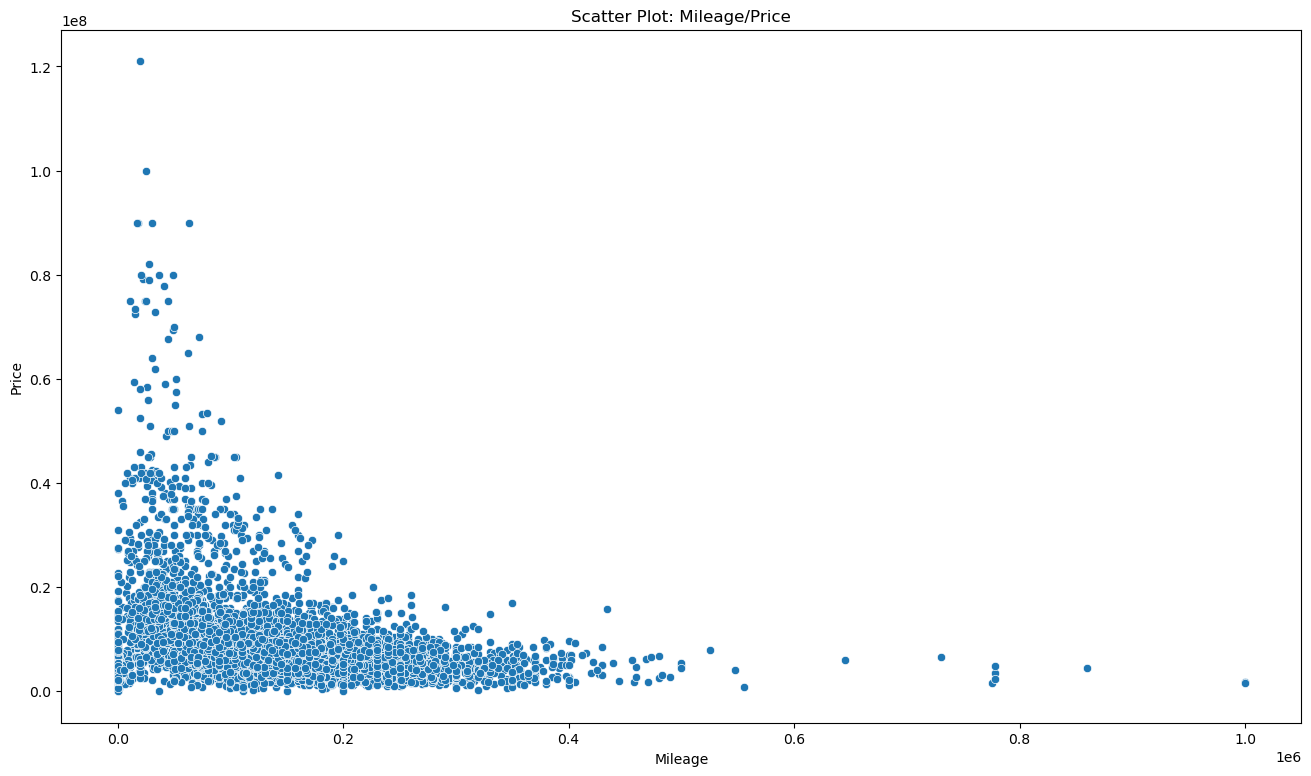

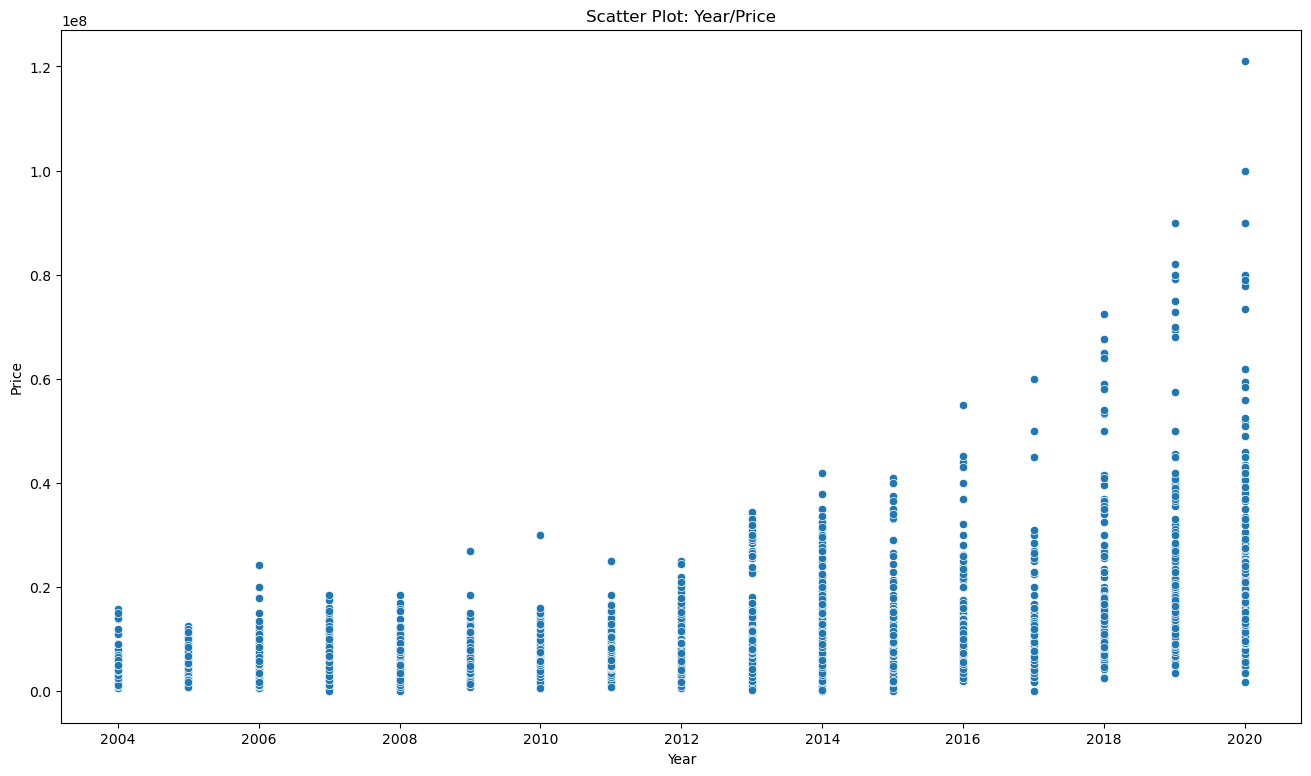

In [15]:
plt.figure(figsize=(16, 9))
sns.scatterplot(x='Mileage', y='Price', data=data_cleaned)
plt.title('Scatter Plot: Mileage/Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.savefig('scatter_plot_mileage_price.pdf') 
plt.show()

plt.figure(figsize=(16, 9))
sns.scatterplot(x='Year', y='Price', data=data_cleaned)
plt.title('Scatter Plot: Year/Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.savefig('scatter_plot_year_price.pdf')
plt.show()

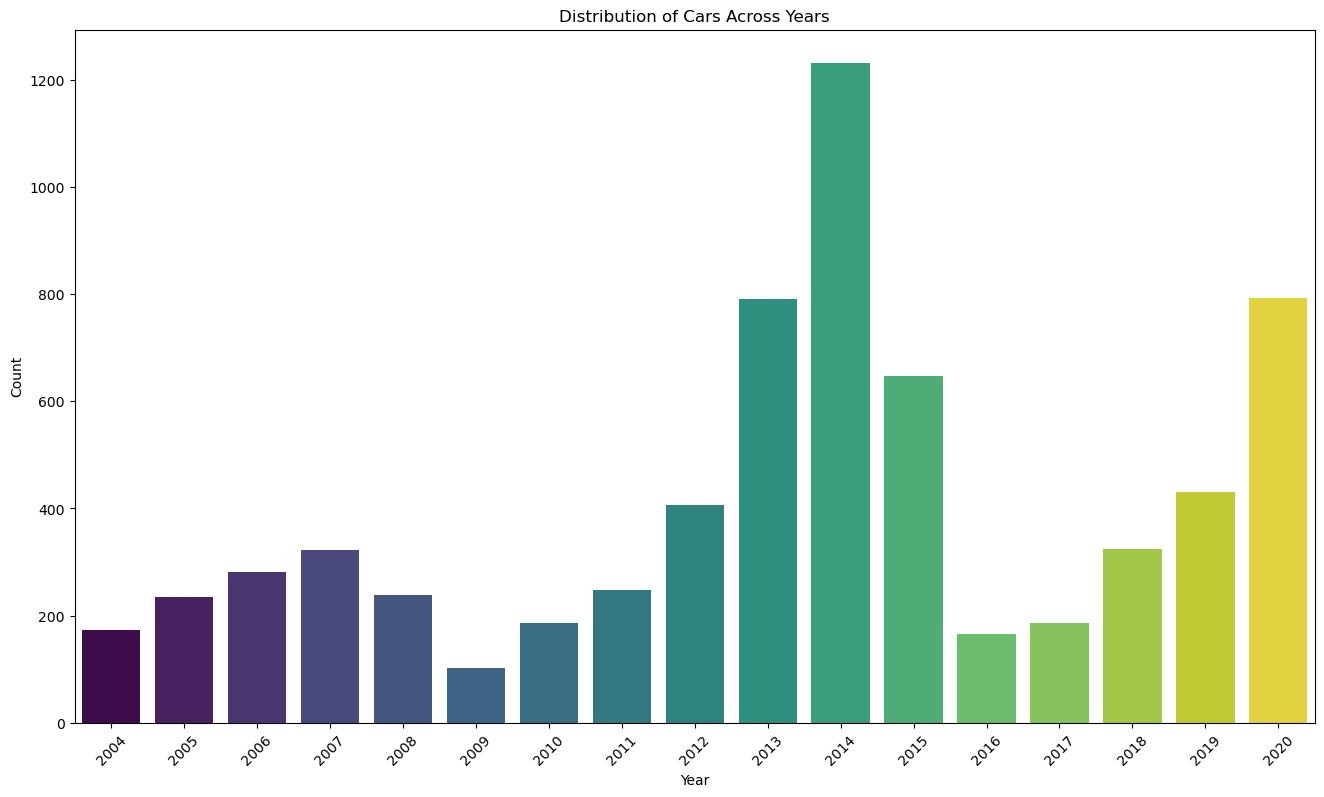

In [16]:
plt.figure(figsize=(16, 9))
sns.countplot(x='Year', data=data_cleaned, hue='Year', palette='viridis', dodge=False)
plt.title('Distribution of Cars Across Years')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend().set_visible(False)
plt.savefig('count_plot_cars_across_years.pdf')
plt.show()

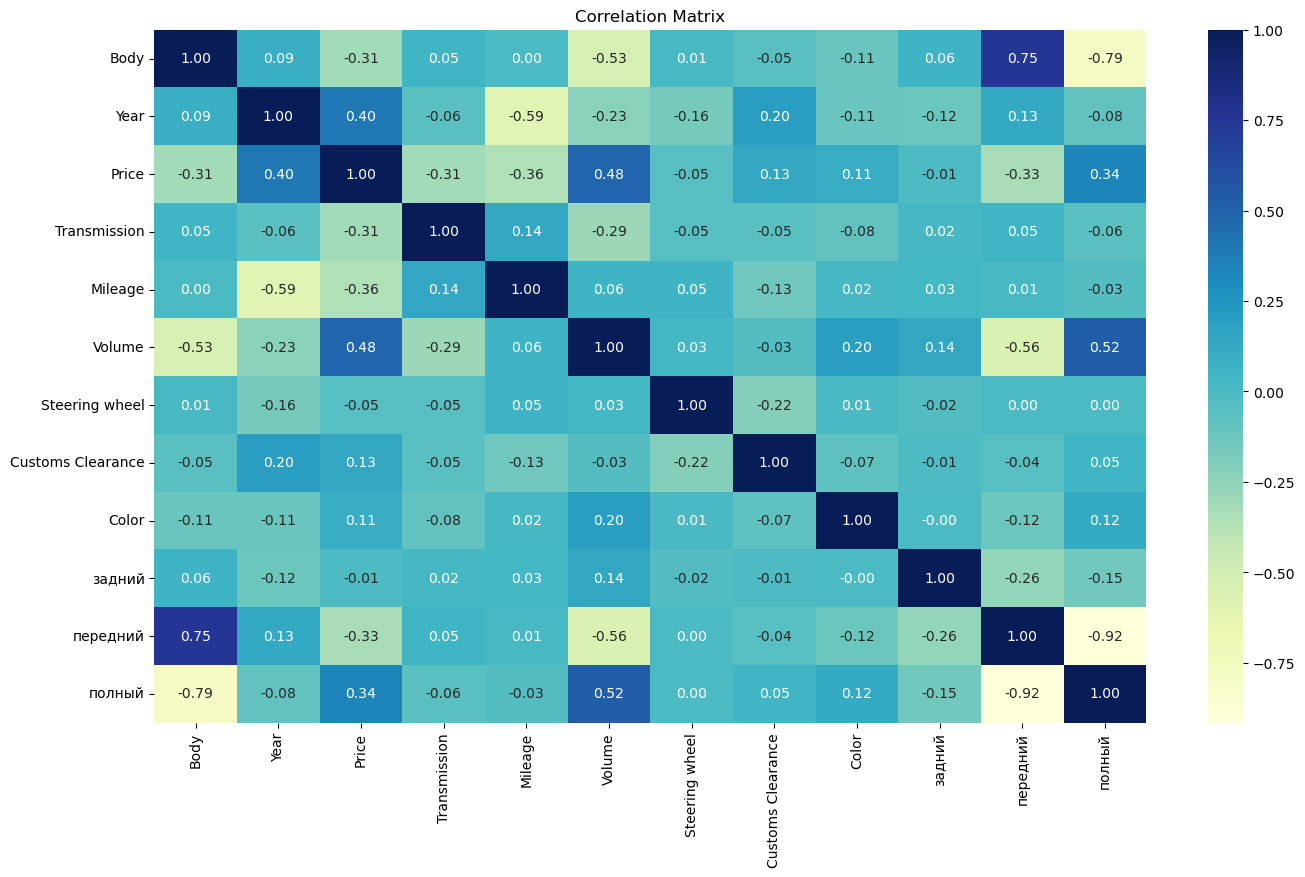

In [17]:
numeric_data_columns = data_cleaned.select_dtypes(include=['number']).columns
corr_matrix = data_cleaned[numeric_data_columns].corr()

plt.figure(figsize=(16, 9))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.show()

In [18]:
data_cleaned = data_cleaned.drop(['Steering wheel'], axis = 1)

In [19]:
data_cleaned['Name'] = le.fit_transform(data_cleaned['Name'])
data_cleaned.drop_duplicates(inplace=True)

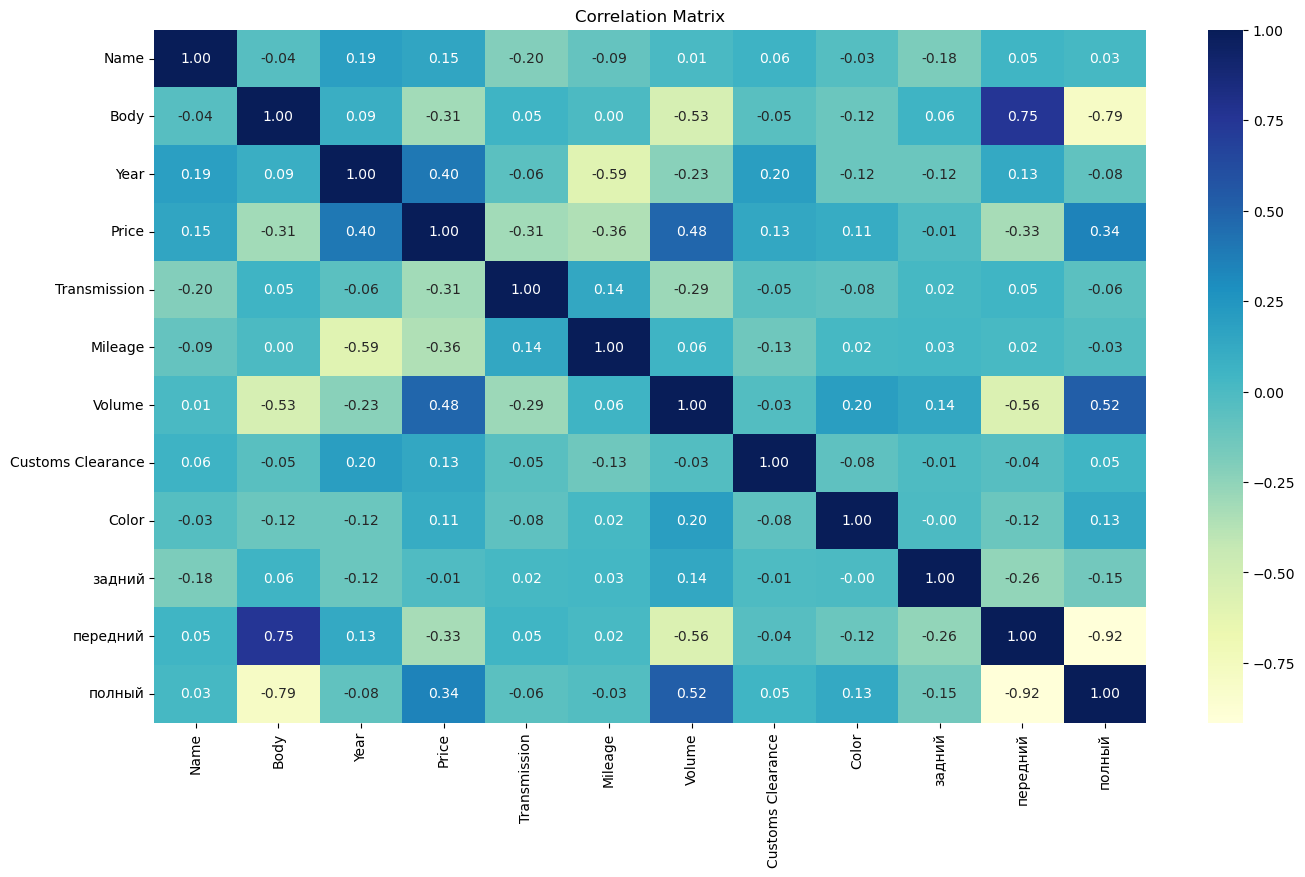

In [23]:
numeric_data_columns = data_cleaned.select_dtypes(include=['number']).columns
corr_matrix = data_cleaned[numeric_data_columns].corr()

plt.figure(figsize=(16, 9))
plt.title('Correlation Matrix')
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='YlGnBu')
plt.savefig('corrolation_matrix.pdf')
plt.show()